In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Housing Dataset operations

### Dataset:
* The property evaluation data from the source: https://data.boston.gov/dataset/property-assessment
* This dataset is a good specifier for housing or property prices.
* There is a field of Zip Code which can help us correlate with the crime data.

### Data Cleaning:
* Data had many other fields apart from the ones used so we just had choosen these fields.
* There were certain abberations and problems with Zip Code.
* Combined the name of the street and filtered the housing data from the commercial data.

In [196]:
def clean_zip_code(zip_code):
    
    if type(zip_code) is float:
        zip_code = int(zip_code)
        zip_code = str(zip_code)
    else:
        if len(zip_code) > 0:
            zip_code = zip_code[:-1]
            zip_code = zip_code[1:]
    
    return zip_code

def pre_process_data(housing_data_all_cols):    
    housing_data = housing_data_all_cols[['ST_NAME',
                                         'ST_NAME_SUF',
                                         'ZIPCODE',
                                         'LU',
                                         'AV_TOTAL',
                                         'YR_BUILT',
                                         'LIVING_AREA']]
    housing_data['ST_NAME'] = housing_data['ST_NAME'] + " " + housing_data['ST_NAME_SUF']
    housing_data = housing_data.drop(['ST_NAME_SUF'], axis=1)
    housing_data = housing_data.dropna(how='any')
    housing_data = housing_data[(housing_data['LU']=='R1')
                                  | (housing_data['LU']=='R2')
                                  | (housing_data['LU']=='R3')
                                  | (housing_data['LU']=='R4')
                                  | (housing_data['LU']=='RC')
                                  | (housing_data['LU']=='CD')
                                  | (housing_data['LU']=='RL')]
    housing_data['ZIPCODE'] = housing_data.ZIPCODE.map(lambda x:clean_zip_code(x))
    
    indexNames = housing_data[ housing_data['AV_TOTAL'] == 0 ].index

    # Delete these row indexes from dataFrame
    housing_data.drop(indexNames , inplace=True)
    
    return housing_data

## Data fetching and pre-processing data

* Here, we fetch the data of different years.
* We pre-process it by combining a column, dropping rows with null entries, filtering only residential data and cleaning the zip code values.

In [197]:
#2015 Property valuation data
fileURL = './housing_data_2015.csv'
housing_data_all_cols_2015 = pd.read_csv(fileURL, header=0)
housing_data_2015 = pre_process_data(housing_data_all_cols_2015)

#2016 Property valuation data
fileURL = './housing_data_2016.csv'
housing_data_all_cols_2016 = pd.read_csv(fileURL, header=0)
housing_data_2016 = pre_process_data(housing_data_all_cols_2016)

#2017 Property valuation data
fileURL = './housing_data_2017.csv'
housing_data_all_cols_2017 = pd.read_csv(fileURL, header=0)
housing_data_2017 = pre_process_data(housing_data_all_cols_2017)

#2018 Property valuation data
fileURL = './housing_data_2018.csv'
housing_data_all_cols_2018 = pd.read_csv(fileURL, header=0)
housing_data_2018 = pre_process_data(housing_data_all_cols_2018)

#2019 Property valuation data
fileURL = './housing_full_data.csv'
housing_data_all_cols = pd.read_csv(fileURL, header=0)
housing_data = pre_process_data(housing_data_all_cols)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (15,60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (15,60) have mixed types. Specify dtype option on i

In [198]:
housing_data.head()

,ST_NAME,ZIPCODE,LU,AV_TOTAL,YR_BUILT,LIVING_AREA
0,BEACON ST,2108,CD,878200,1850.0,789.0
1,BEACON ST,2108,CD,817600,1850.0,752.0
2,BEACON ST,2108,CD,849500,1850.0,792.0
3,BEACON ST,2108,CD,734400,1850.0,720.0
4,BEACON ST,2108,CD,2162300,1850.0,1482.0


## Analyzing the data
* Below we analyze the 5 streets having the least housing prices in a Zip Code.

In [199]:
st_zp_mean = housing_data.groupby(["ZIPCODE","ST_NAME"]).agg({'AV_TOTAL':'mean'})
top_5_streets = st_zp_mean['AV_TOTAL'].groupby(level=0, group_keys=False)
top_5_streets.nsmallest(10)

ZIPCODE  ST_NAME                       
2026     BONAD RD                          5.101000e+05
2108     HAMILTON PL                       3.177460e+05
         MT VERNON  ST                     6.554000e+05
         WILLOW ST                         7.603886e+05
         RIVER ST                          1.000343e+06
         CHESTNUT  ST                      1.426300e+06
         RIVER STREET PL                   1.509900e+06
         CEDAR LANE WY                     1.560694e+06
         BEACON ST                         1.563050e+06
         SPRUCE CT                         1.771525e+06
         MT VERNON ST                      1.786410e+06
2109     ARCHWAY ST                        5.079000e+05
         HANOVER ST                        5.095909e+05
         SALUTATION ST                     5.580667e+05
         CLARK ST                          5.809655e+05
         FOSTER ST                         5.868107e+05
         HOLDEN CT                         6.563250e+05
        

* Below we analyze the 5 streets having the most housing prices in a Zip Code.

In [200]:
top_5_streets.nlargest(10)

ZIPCODE  ST_NAME                       
2026     BONAD RD                          5.101000e+05
2108     COURT ST                          1.285650e+07
         BOWDOIN ST                        1.276150e+07
         MT VERNON PL                      8.995967e+06
         WASHINGTON ST                     8.875500e+06
         BEACON  ST                        7.900400e+06
         LOUISBURG SQ                      7.321565e+06
         WINTER ST                         5.347159e+06
         PARK ST                           4.714167e+06
         MARSHALL ST                       4.338000e+06
         CHARLES ST                        3.886056e+06
2109     WASHINGTON ST                     2.374355e+08
         STATE ST                          4.927428e+06
         UNION WH                          2.860034e+06
         BATTERY ST                        1.710455e+06
         HARRIS ST                         1.538833e+06
         COMMERCIAL  ST                    1.533882e+06
        

Grouping the data by the Zip codes

In [140]:
zipcode_grpby_2019 = pd.DataFrame(housing_data.groupby(['ZIPCODE']).mean()['AV_TOTAL'])
zipcode_grpby_2018 = pd.DataFrame(housing_data_2018.groupby(['ZIPCODE']).mean()['AV_TOTAL'])
zipcode_grpby_2017 = pd.DataFrame(housing_data_2017.groupby(['ZIPCODE']).mean()['AV_TOTAL'])
zipcode_grpby_2016 = pd.DataFrame(housing_data_2016.groupby(['ZIPCODE']).mean()['AV_TOTAL'])

zipcode_grpby_2018 = zipcode_grpby_2018.reset_index()
zipcode_grpby_2017 = zipcode_grpby_2017.reset_index()
zipcode_grpby_2016 = zipcode_grpby_2016.reset_index()

zipcode_grpby_2017 = zipcode_grpby_2017[zipcode_grpby_2017['ZIPCODE']!='']

zipcode_grpby_2018 = zipcode_grpby_2018.rename(columns={'ZIPCODE': 'ZIP'})
zipcode_grpby_2017 = zipcode_grpby_2017.rename(columns={'ZIPCODE': 'ZIP'})
zipcode_grpby_2016 = zipcode_grpby_2016.rename(columns={'ZIPCODE': 'ZIP'})

## Fetching the crime data

In [129]:
#2018 Property valuation data
fileURL = './crime_data_zip.csv'
crime_data = pd.read_csv(fileURL, header=0)

## Cleaning the Crime data

* Now the crime data has the data from June 2015, but the housing data is in parts, so we divided the crime data into years.


In [130]:
def get_crime_of_year(year):
    crime_data_part_one = crime_data[(crime_data.UCR_PART == 'Part One') & (crime_data.YEAR == year)]
    crime_data_zip_code = pd.DataFrame(crime_data_part_one.groupby('ZIP').count()['INCIDENT_NUMBER'])
    
    return crime_data_zip_code


crime_data_zip_code_2018 = get_crime_of_year(2018)
crime_data_zip_code_2017 = get_crime_of_year(2017)
crime_data_zip_code_2016 = get_crime_of_year(2016)

crime_data_zip_code_2018 = crime_data_zip_code_2018.reset_index()
crime_data_zip_code_2017 = crime_data_zip_code_2017.reset_index()
crime_data_zip_code_2016 = crime_data_zip_code_2016.reset_index()

In [131]:
crime_data_zip_code_2018.head()

,ZIP,INCIDENT_NUMBER
0,1125,427
1,2026,47
2,2102,193
3,2108,269
4,2109,370


In [132]:
zipcode_grpby_2016.head()

,ZIP,AV_TOTAL
0,2090,6.375000e+05
1,2108,2.547800e+06
2,2109,3.219941e+06
3,2110,5.980761e+06
4,2111,2.877585e+06


## Merging and analyzing the correlation between two datasets

### Correlation for the year 2018
* One can clearly see here that most places where the crime rates are high have a comparitively lower housing rates.
* Though there are certain outliers like one with Zip code 02215 or 02128 where there are other factors that help the housing prices like Universities nearby or city centers or prime locations like Prudential center.

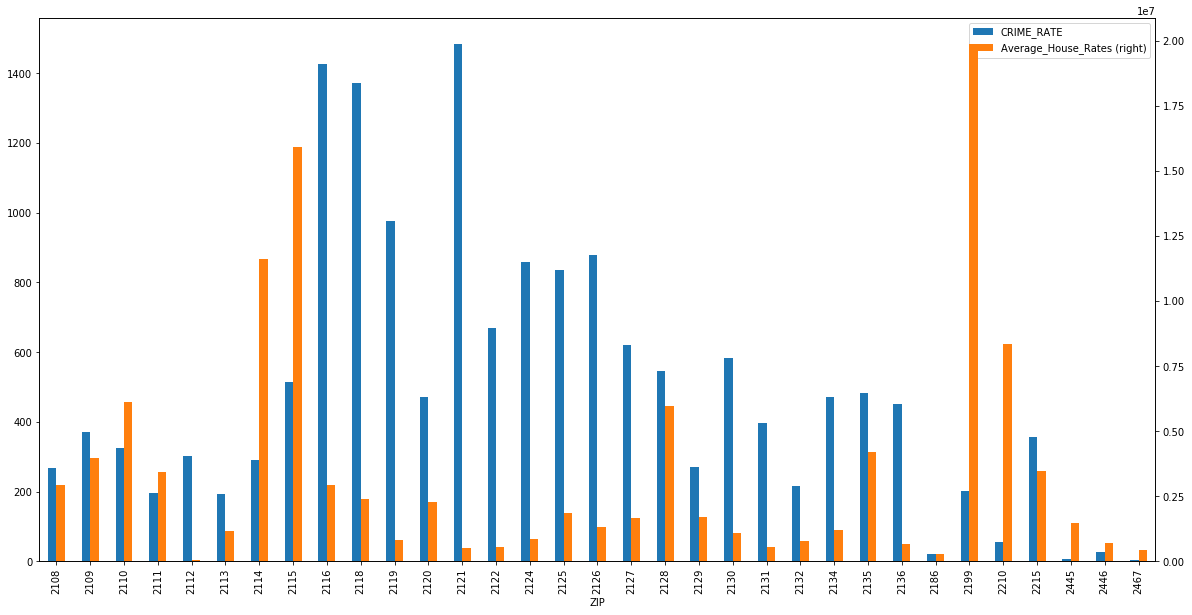

In [141]:
crime_data_zip_code_2018.ZIP = crime_data_zip_code_2018.ZIP.map(lambda x:int(x))
zipcode_grpby_2018.ZIP = zipcode_grpby_2018.ZIP.map(lambda x:int(x))

merged = crime_data_zip_code_2018.merge(zipcode_grpby_2018, how='inner', on='ZIP')
merged = merged.rename(columns={'AV_TOTAL': 'Average_House_Rates', 'INCIDENT_NUMBER':'CRIME_RATE'})
merged.plot(kind='bar', x='ZIP', secondary_y='Average_House_Rates', figsize=(20, 10))

### Correlation for the year 2017
* A very smilar trend seems to be followed here.

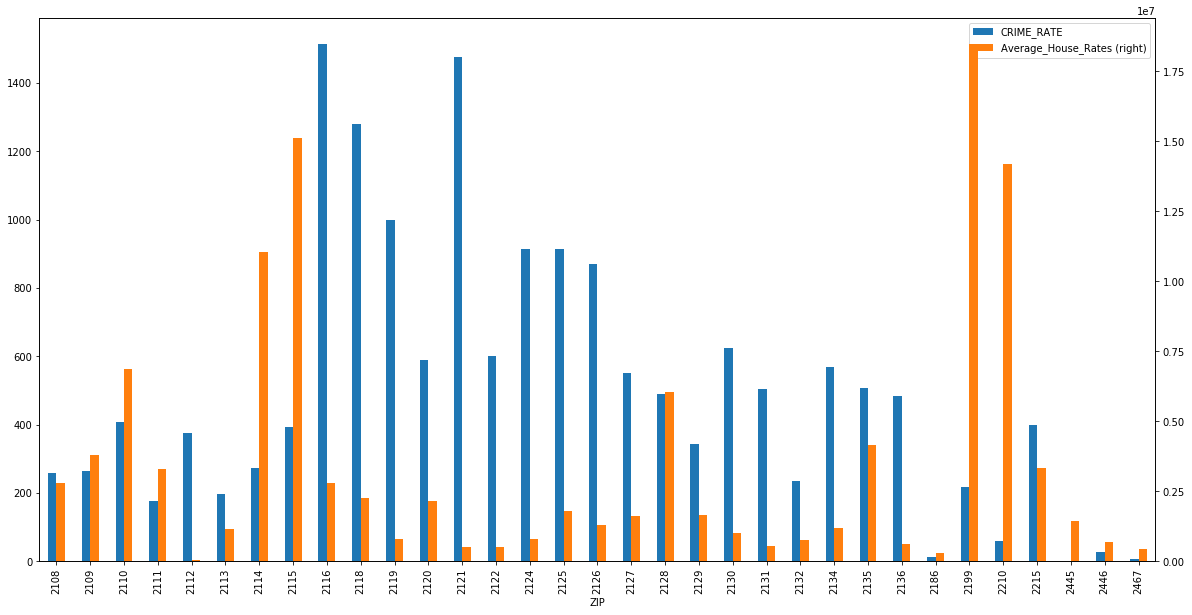

In [142]:
crime_data_zip_code_2017.ZIP = crime_data_zip_code_2017.ZIP.map(lambda x:int(x))
zipcode_grpby_2017.ZIP = zipcode_grpby_2017.ZIP.map(lambda x:int(x))

merged = crime_data_zip_code_2017.merge(zipcode_grpby_2017, how='inner', on='ZIP')
merged = merged.rename(columns={'AV_TOTAL': 'Average_House_Rates', 'INCIDENT_NUMBER':'CRIME_RATE'})
merged.plot(kind='bar', x='ZIP', secondary_y='Average_House_Rates', figsize=(20, 10))

### Correlation for year 2016

* Same trend can be seen for the year 2016.

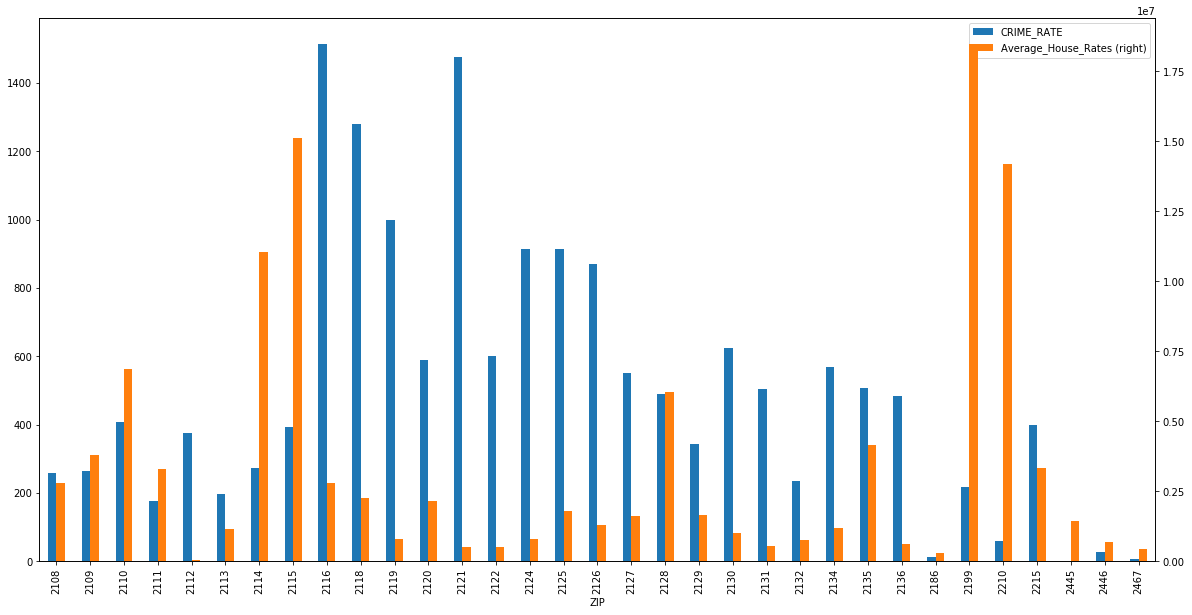

In [143]:
crime_data_zip_code_2016.ZIP = crime_data_zip_code_2016.ZIP.map(lambda x:int(x))
zipcode_grpby_2016.ZIP = zipcode_grpby_2016.ZIP.map(lambda x:int(x))

merged = crime_data_zip_code_2017.merge(zipcode_grpby_2017, how='inner', on='ZIP')
merged = merged.rename(columns={'AV_TOTAL': 'Average_House_Rates', 'INCIDENT_NUMBER':'CRIME_RATE'})
merged.plot(kind='bar', x='ZIP', secondary_y='Average_House_Rates', figsize=(20, 10))